In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
single_image= X_train[0]

In [8]:
single_image.shape

(28, 28)

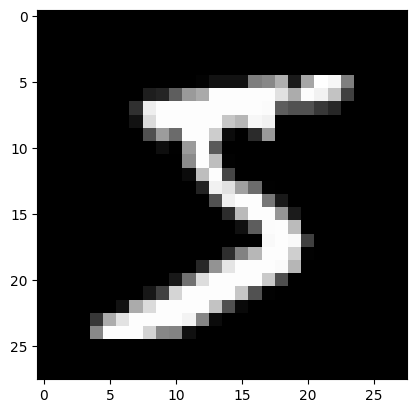

In [9]:
plt.imshow(single_image,cmap='gray')

In [10]:
y_train.shape

(60000,)

In [11]:
X_train.min()

0

In [12]:
X_train.max()

255

In [13]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [14]:
X_train_scaled.min()

0.0

In [15]:
X_train_scaled.max()

1.0

In [16]:
y_train[0]

5

In [17]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [18]:
type(y_train_onehot)

numpy.ndarray

In [19]:
y_train_onehot.shape

(60000, 10)

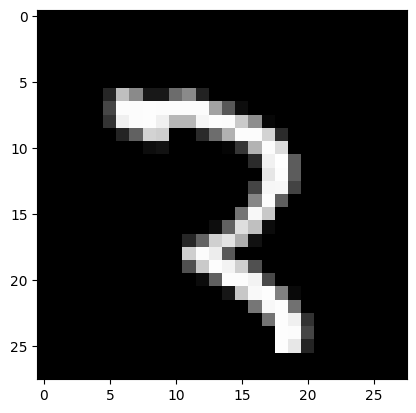

In [20]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')


In [21]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [23]:
model = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [25]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 51s 53ms/step - loss: 0.1562 - accuracy: 0.9543 - val_loss: 0.0481 - val_accuracy: 0.9847
Epoch 2/5
938/938 [==============================] - 48s 52ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0423 - val_accuracy: 0.9863
Epoch 3/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0305 - val_accuracy: 0.9894
Epoch 4/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0357 - val_accuracy: 0.9873
Epoch 5/5
938/938 [==============================] - 47s 50ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0286 - val_accuracy: 0.9902


In [27]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.156211,0.954300,0.048067,0.9847
1,0.046845,0.985233,0.042330,0.9863
2,0.032245,0.990250,0.030550,0.9894
3,0.023519,0.992217,0.035667,0.9873
4,0.018711,0.994033,0.028648,0.9902


<Axes: >

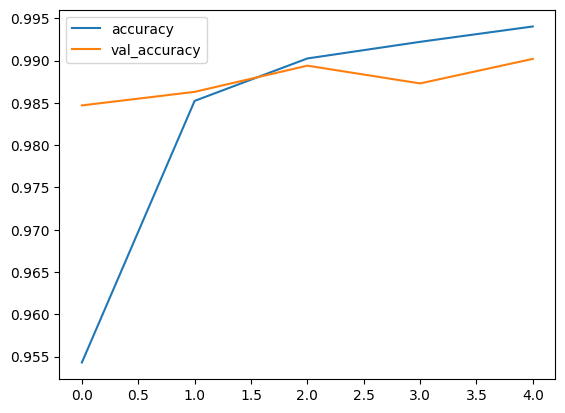

In [29]:

metrics[['accuracy','val_accuracy']].plot()

Bharath
212221230013


<Axes: >

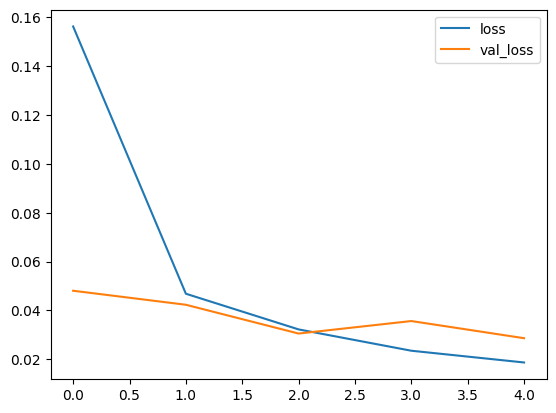

In [45]:
print("Bharath\n212221230013")
metrics[['loss','val_loss']].plot()

In [31]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 3s 8ms/step


In [47]:
print("Bharath\n212221230013")
print(confusion_matrix(y_test,x_test_predictions))

Bharath
212221230013
[[ 975    0    1    0    0    0    1    2    1    0]
 [   0 1131    0    2    0    1    1    0    0    0]
 [   1    1 1021    1    0    0    1    7    0    0]
 [   0    0    0 1008    0    1    0    0    1    0]
 [   1    1    0    0  970    0    1    1    1    7]
 [   2    0    1    7    0  880    1    1    0    0]
 [   3    2    0    0    3    1  948    0    1    0]
 [   0    1    3    1    0    0    0 1020    0    3]
 [   3    2    4    6    0    1    1    1  954    2]
 [   1    0    0    3    2    6    0    1    1  995]]


In [46]:
print("Bharath\n212221230013")
print(classification_report(y_test,x_test_predictions))

Bharath
212221230013
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [35]:
img = image.load_img('pic.jpg')

In [36]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [38]:
img = image.load_img('pic.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [39]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 55ms/step


In [40]:
print(x_single_prediction)

[3]


Bharath
212221230013


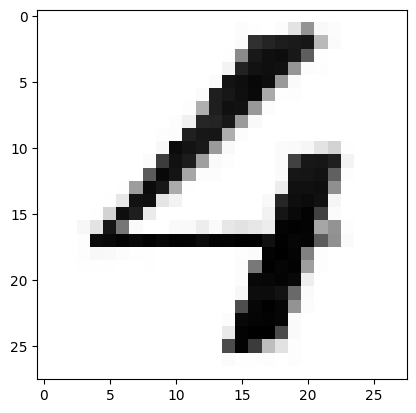

In [48]:
print("Bharath\n212221230013")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [42]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [43]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 37ms/step


In [50]:
print("Bharath\n212221230013")

print(x_single_prediction)

Bharath
212221230013
[4]
